### Loading the environment

https://gym.openai.com/envs/Taxi-v2/

In [30]:
import gym
env = gym.make('Taxi-v2')

### Initialization and rendering

In [31]:
initial_state = env.reset()

# (taxi row, taxi column, passenger index, destination index)
print("Decoded state", list(env.env.decode(initial_state)))

env.render()

Decoded state [3, 4, 1, 2]
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



### Q-learning Hyperparameters

In [32]:
alpha = 0.1
gamma = 0.6
epsilon = 0.8

### Initializing the Q-table

In [33]:
import numpy as np
from collections import defaultdict

# Ideally, the size of Q-table is state_space_size x action_space_size
q_table = np.zeros([env.observation_space.n, env.action_space.n])

### Updating the Q-values after every epoch

![https://s31.postimg.cc/tmim26kqx/q_learning_equation.png](https://s31.postimg.cc/tmim26kqx/q_learning_equation.png?dl=1)

In [34]:
def q_learning_update(q_table, env, state, epsilon):
    """
    Updates the Q-values according to the Q-learning equation.
    """
    if random.uniform(0, 1) > epsilon:
        action = env.action_space.sample() # select a random action
    else:
        action = select_optimal_action(q_table, state) # select an optimal action
    
    next_state, reward, done, _ = env.step(action)
    old_q_value = q_table[state][action]


    # Maximum q_value for the actions in next state
    next_max = np.max(q_table[next_state])

    new_q_value = (1 - alpha) * old_q_value + alpha * (reward + gamma * next_max)

    # Update the q_value
    q_table[state][action] = new_q_value

    return next_state, reward, done

In [35]:
import random

def select_optimal_action(q_table, state):
    """
    Given a state, select the action from the action space having the
    highest Q-value in the q_table.
    """
    if np.sum(q_table[state]) == 0:
        return random.randint(0, q_table.shape[1]-1)
    
    return np.argmax(q_table[state])

In [39]:
def train_agent(q_table, env, num_episodes, epsilon):
    for i in range(num_episodes):
        state = env.reset()

        done = False
        while not done:
            state, reward, done = q_learning_update(q_table, env, state, epsilon)
    
    return q_table

### Evaluating our agent by "exploition" of q-table

In [37]:
def run_trials(q_table, env, num_trials):
    data_by_episode = []

    for i in range(num_trials):
        state = env.reset()
        epochs, num_penalties, episode_reward = 0, 0, 0
        
        done = False
        while not done:
            next_action = select_optimal_action(q_table, state)
            state, reward, done, _ = env.step(next_action)

            if reward == -10:
                num_penalties += 1

            epochs += 1
            episode_reward += reward
        
        data_by_episode.append((epochs, num_penalties, episode_reward))
    
    return data_by_episode

### Calculating performance metrics

In [38]:
def calculate_stats(trial_data):
    epochs, penalties, rewards = zip(*trial_data)
    total_epochs, total_penalties, total_reward = sum(epochs), sum(penalties), sum(rewards)
    num_trials = len(epochs)
    average_time = total_epochs / float(num_trials)
    average_penalties = total_penalties / float(num_trials)
    average_reward_per_move = total_reward/float(total_epochs)
    
    return (average_time, average_penalties, average_reward_per_move)

### Let's begin the training

In [40]:
data_to_plot = []
train_episodes_before_eval = 100
num_episodes_for_eval = 50

while True:
    q_table = train_agent(q_table, env, train_episodes_before_eval, epsilon=epsilon)
    trial_data = run_trials(q_table, env, num_episodes_for_eval)
    
    average_time, average_penalties, average_reward_per_move = calculate_stats(trial_data)
    
    data_to_plot.append((average_time, average_penalties, average_reward_per_move))
    
    if average_penalties == 0 and average_reward_per_move > 0.8:
        print("Average time steps taken: {}".format(average_time))
        print("Average number of penalties incurred: {}".format(average_penalties))
        print("Average reward per move: {}".format(average_reward_per_move))
        break

Average time steps taken: 11.66
Average number of penalties incurred: 0.0
Average reward per move: 0.8010291595197255


In [42]:
!pip install matplotlib

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

time_steps_by_evals = [data[0] for data in data_to_plot]
penalties_by_evals = [data[1] for data in data_to_plot]
rewards_by_evals =  [data[2] for data in data_to_plot]

episode_counts = [i*train_episodes_before_eval for i in range(len(data_to_plot))]
episode_counts

[0,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2000,
 2100,
 2200,
 2300,
 2400,
 2500,
 2600,
 2700,
 2800,
 2900,
 3000,
 3100,
 3200,
 3300,
 3400,
 3500,
 3600,
 3700,
 3800,
 3900,
 4000,
 4100,
 4200,
 4300,
 4400,
 4500,
 4600,
 4700,
 4800,
 4900,
 5000,
 5100,
 5200,
 5300,
 5400,
 5500,
 5600,
 5700,
 5800,
 5900,
 6000,
 6100,
 6200,
 6300,
 6400,
 6500,
 6600,
 6700,
 6800,
 6900,
 7000,
 7100,
 7200,
 7300,
 7400,
 7500,
 7600,
 7700,
 7800,
 7900,
 8000,
 8100,
 8200,
 8300,
 8400,
 8500,
 8600,
 8700,
 8800,
 8900,
 9000,
 9100,
 9200,
 9300,
 9400,
 9500,
 9600,
 9700,
 9800,
 9900,
 10000,
 10100,
 10200,
 10300,
 10400,
 10500,
 10600,
 10700,
 10800,
 10900,
 11000,
 11100,
 11200,
 11300,
 11400,
 11500,
 11600,
 11700,
 11800,
 11900,
 12000,
 12100,
 12200,
 12300,
 12400,
 12500,
 12600,
 12700,
 12800,
 12900,
 13000,
 13100,
 13200,
 13300,
 13400,
 13500,
 13600,
 13700,
 13800,


Text(0,0.5,'Average rewards per move')

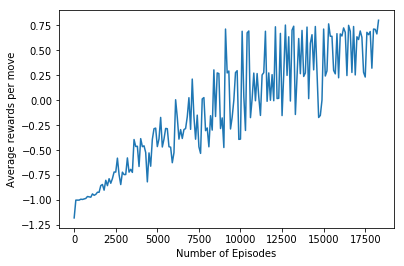

In [45]:
plt.plot(episode_counts, rewards_by_evals)
plt.xlabel("Number of Episodes")
plt.ylabel("Average rewards per move")

Text(0,0.5,'Time steps to finish episode')

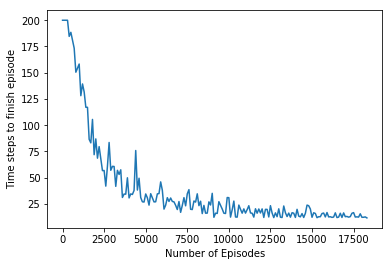

In [46]:
plt.plot(episode_counts, time_steps_by_evals)
plt.xlabel("Number of Episodes")
plt.ylabel("Time steps to finish episode")

### Saving the Q-table

In [47]:
with open("q_table.save", "wb") as f:
    np.save(f, q_table)

### Loading the Q-table

In [48]:
data = None
with open("q_table.save", "rb") as f:
    data = np.load(f)

data.shape

(500, 6)